In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

In [0]:
import tensorflow as tf 
tf.test.gpu_device_name() 

In [0]:
import os
import string
from matplotlib import pyplot as plt
from math import floor
import seaborn as sns
import pandas as pd
import numpy as np
import random
from scipy import ndarray      # n-dimensional Array
import skimage as sk           # used for image Processing
from skimage import transform
from skimage import util
import warnings
import keras
warnings.filterwarnings('ignore')  # remove the warnings
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.regularizers import l2 # for model
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Flatten, AvgPool2D,InputLayer,GlobalAveragePooling2D,LSTM,Embedding
from keras.layers import  BatchNormalization as btn
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler,EarlyStopping   
from IPython.display import HTML
import base64
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from scipy.ndimage.interpolation import shift
from keras.optimizers import Adam
from keras.datasets import cifar10
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
import cv2 as cv
import keras.utils as kp
import math
import librosa as lb
import glob
import IPython.display as ipd
from google.colab.patches import cv2_imshow

%matplotlib inline

In [4]:
%cd /content/drive/My\ Drive/DC GAN-Anime/

/content/drive/My Drive/DC GAN-Anime


In [0]:
def create_image(filename):
  img = cv.imread(filename)
  img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  return cv.resize(img_rgb,(64,64),interpolation = cv.INTER_CUBIC)


In [0]:
path = '/content/drive/My Drive/DC GAN-Anime/data/images/*.*'       # providing the path
m = 30000                        # taking the no. of images from the dataset
X = np.ndarray(shape=(m,64,64,3),dtype=np.float32)     # size of the X dataset

for i,filename in tqdm(enumerate(glob.glob(path))):
  if i<30000:
    img = create_image(filename)
    X[i,:]  = np.squeeze(img.reshape((64,64,3)))                    # reshape the matrix into 64*64*3.Squeeze is used to remove the single dim. entry
  else:
    break   

30000it [2:12:52,  2.73it/s]

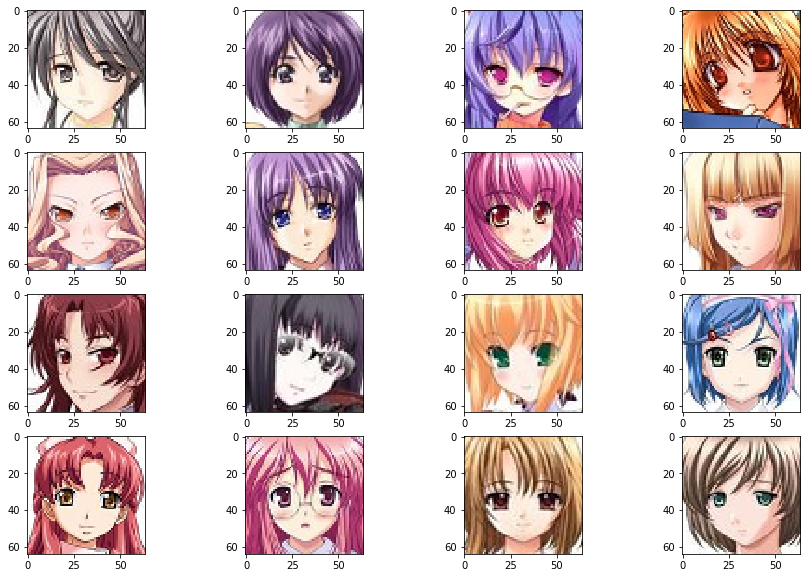

In [0]:
plt.figure(figsize=(15,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow((X[i]).astype(np.uint8))
  

# Anime Dataset

In [0]:
%cd /content/drive/My\ Drive/DC GAN-Anime/

/content/drive/My Drive/DC GAN-Anime


In [0]:
np.save('real_data.npy',X,allow_pickle=True)

In [0]:
X.shape                          # contains 30,000 images of size 64*64

(30000, 64, 64, 3)